# Genomic Data Analysis of Breast Cancer Diagnosis

**Author**: Eric Simonds  
**Date**: May 2024

---

## Introduction

Breast cancer is one of the most common cancers worldwide, and understanding the genetic mutations associated with it can lead to better diagnosis and treatment strategies. This project aims to analyze a dataset of breast cancer patients to identify common mutations and explore their correlations with clinical features and how they relate to the diagnosis.

## Objectives

The primary objectives of this project are:
- To compare common characteristics of tumors in breast cancer patients.
- To analyze the correlation between these mutations and clinical features such as tumor size and texture.
- To visualize the distribution and relationships of these features and diagnosis.
- To build a Machine Learning Model that can predict a diagnosis based on the features of the tumor.

## Data Source

The dataset used in this analysis is the Breast Cancer Wisconsin (Diagnostic) Data Set, obtained from [Kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data). This dataset includes various clinical features and mutation data for breast cancer patients.

## Methodology

The project follows these steps:
1. **Data Acquisition**: Load the dataset and inspect its structure.
2. **Data Preprocessing**: Clean the data by handling missing values and normalizing features.
3. **Exploratory Data Analysis (EDA)**: Perform descriptive statistical analysis and visualize the data.
4. **Reporting**: Document the entire process and summarize key insights.

## Outline

- **Section 1**: Data Acquisition and Inspection
- **Section 2**: Data Preprocessing
- **Section 3**: Exploratory Data Analysis (EDA)
- **Section 4**: Conclusion and Summary

## Section 1
### Data Acquisition and Inspection

In [14]:
# Import the necessary packages to analyze the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# Import data to pandas dataframe
dataset = pd.read_csv("bc_data.csv")

In [8]:
# Examine first rows of data 
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Section 2
### Data Preprocessing

In [11]:
# Remove additional Unnamed column
dataset.drop("Unnamed: 32", axis=1, inplace=True)

<Axes: >

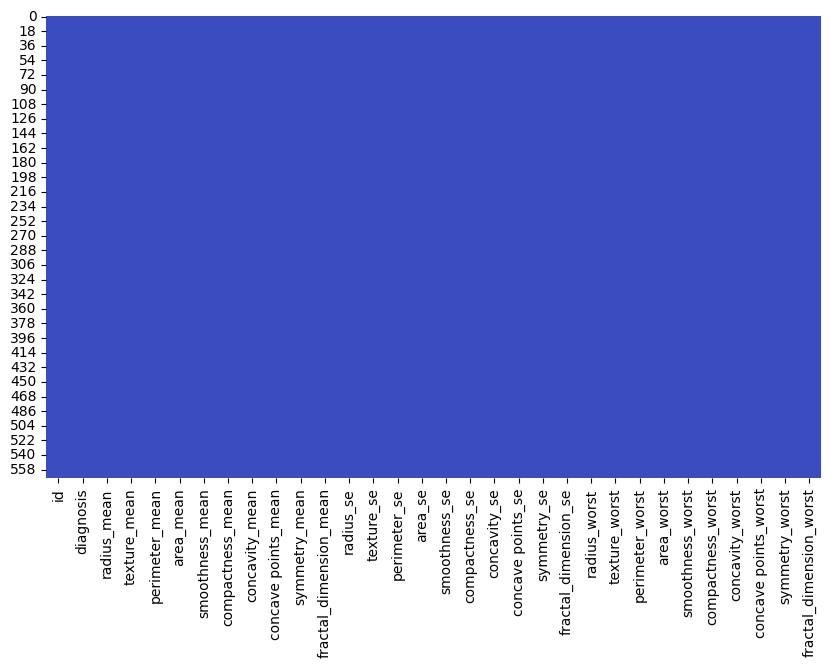

In [16]:
# Check for any missing values in the data using a heatmap
missing_values = dataset.isnull()
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cbar=False, cmap="coolwarm")


In [17]:
# Let's look at some simple statistics to our data
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Text(0, 0.5, 'Count')

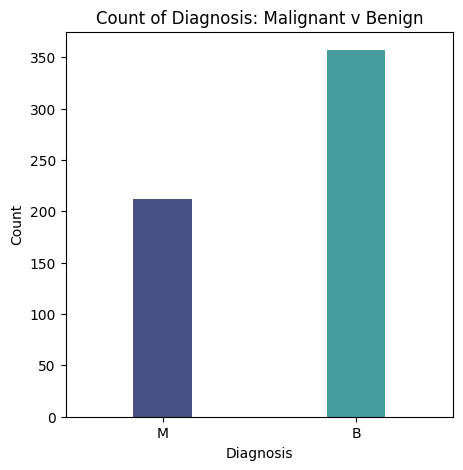

In [34]:
# Let's examine the diagnosis column and compare the categories
plt.figure(figsize=(5, 5))
sns.countplot(x='diagnosis', data=dataset, hue='diagnosis', palette='mako', width=0.3)
plt.title("Count of Diagnosis: Malignant v Benign")
plt.xlabel('Diagnosis')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

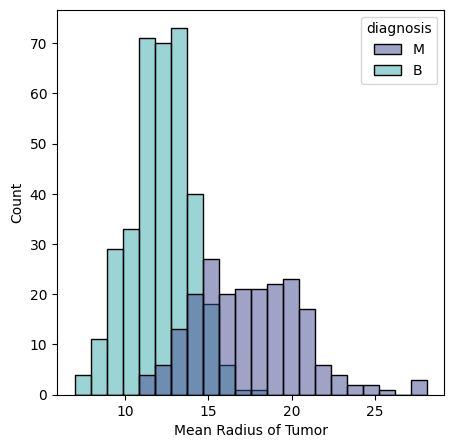

In [37]:
plt.figure(figsize=(5, 5))
sns.histplot(x='radius_mean', hue='diagnosis', data=dataset, palette='mako')
plt.xlabel('Mean Radius of Tumor')
plt.ylabel('Count')

Text(0, 0.5, 'Mean Radius of Tumor')

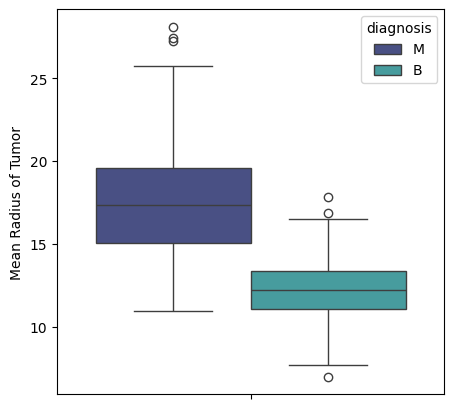

In [40]:
plt.figure(figsize=(5, 5))
sns.boxplot(y='radius_mean', hue='diagnosis', data=dataset, palette='mako')
plt.ylabel('Mean Radius of Tumor')


## Section 3
### Exploratory Data Analysis

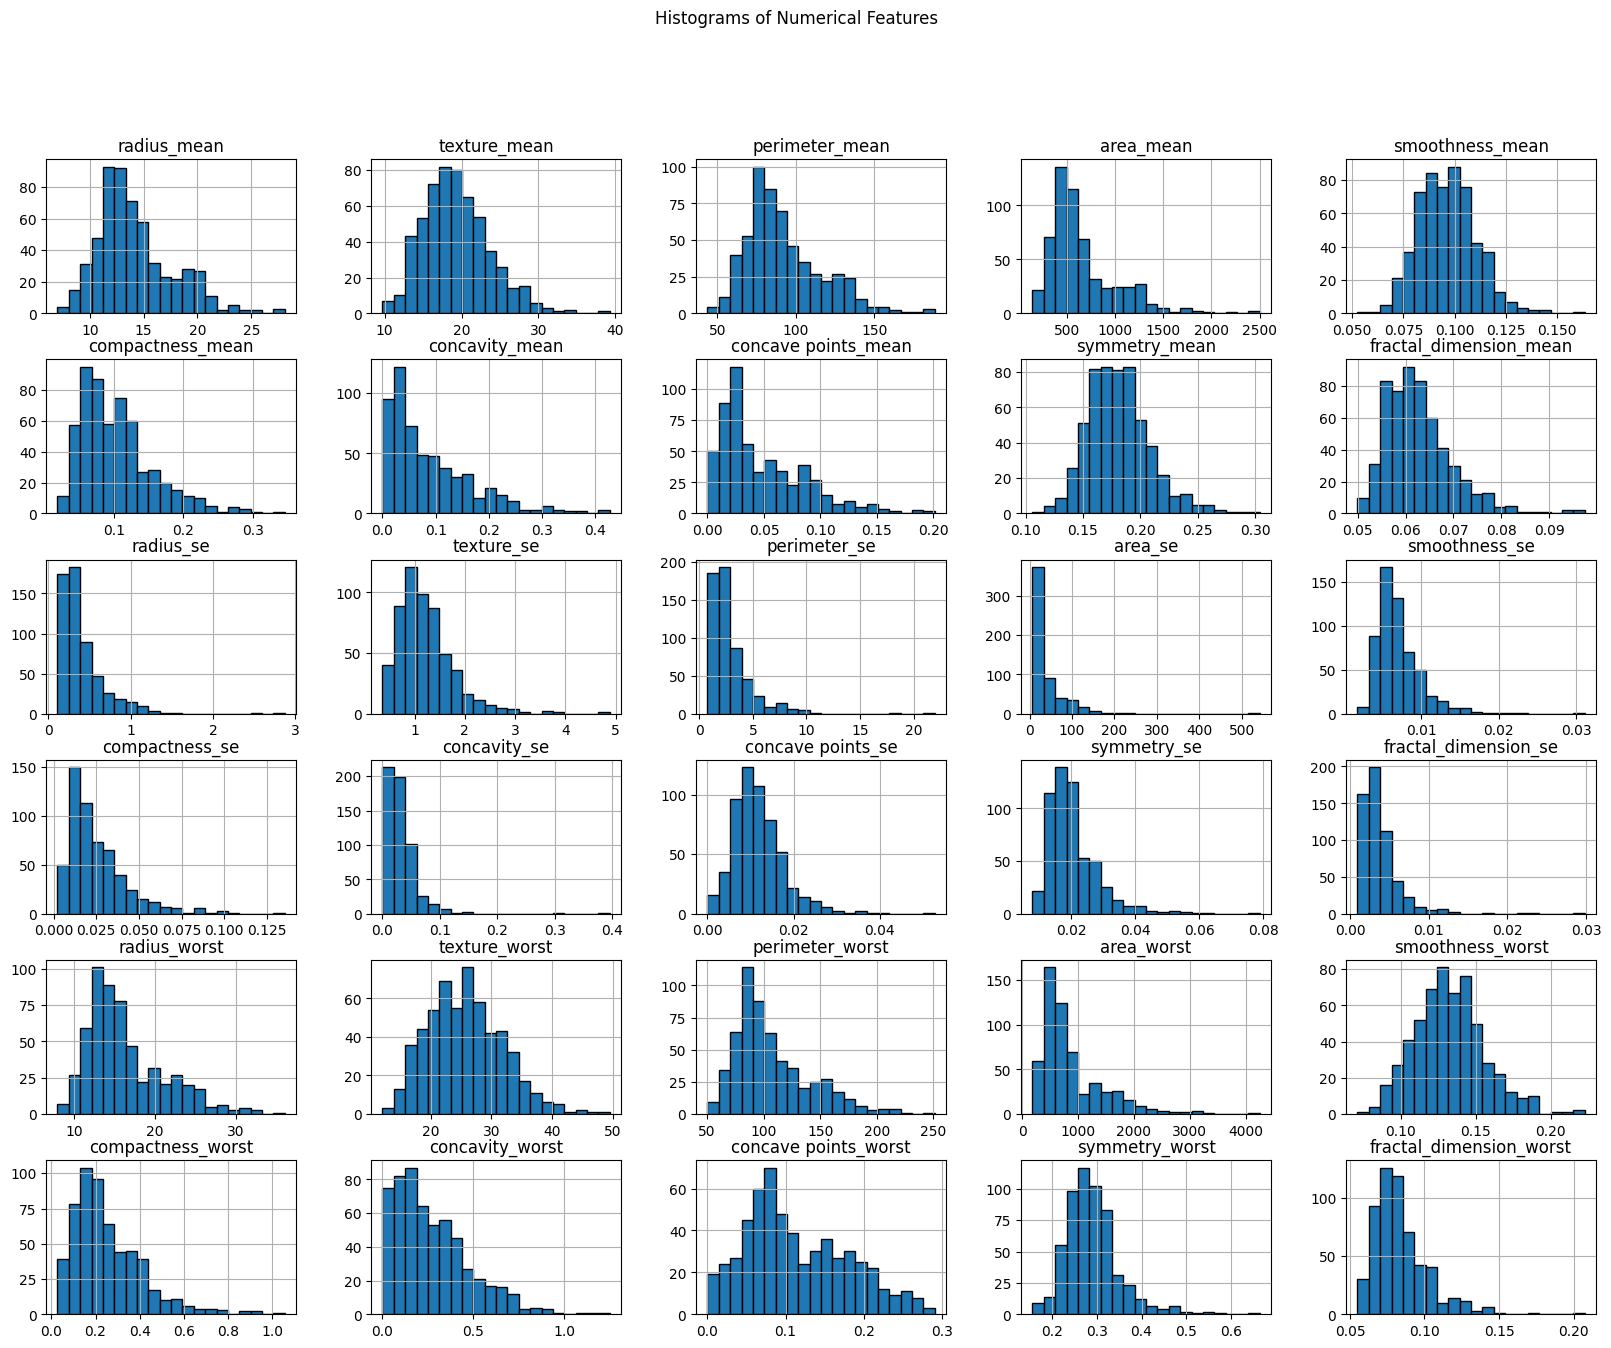

In [44]:
dataset.drop('id', axis=1).hist(bins=20, figsize=(20, 15), edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

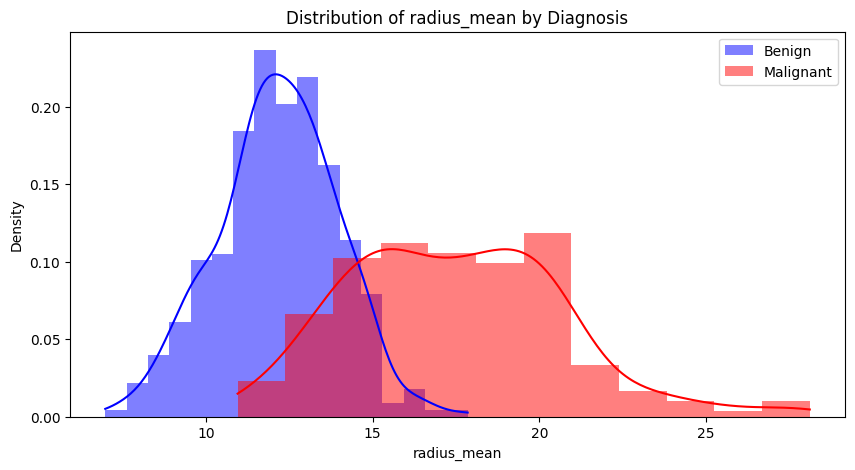

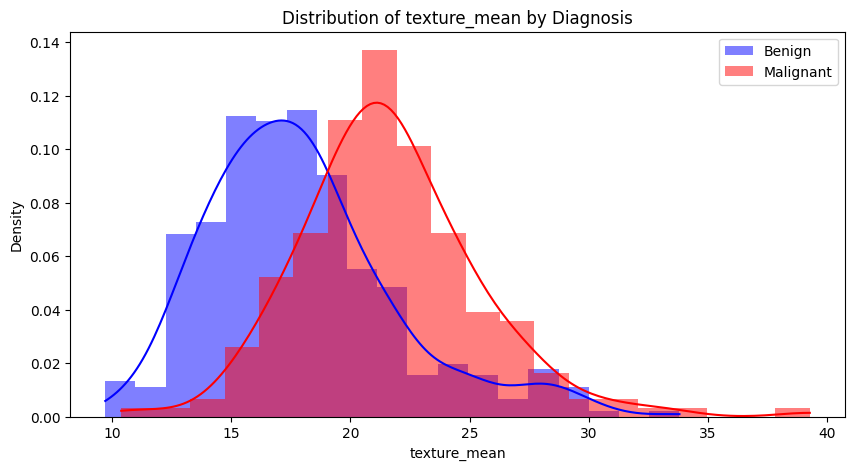

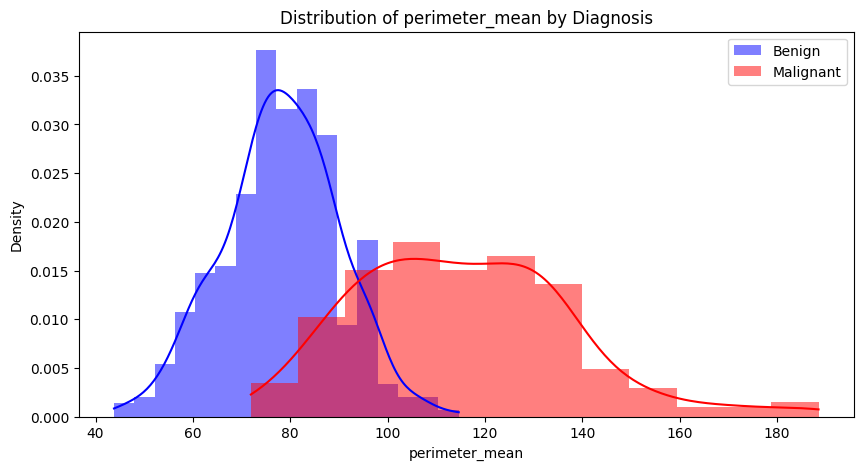

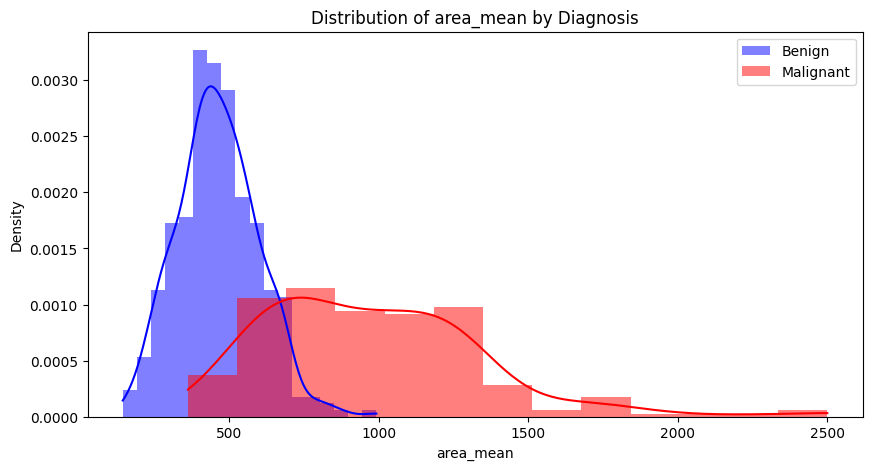

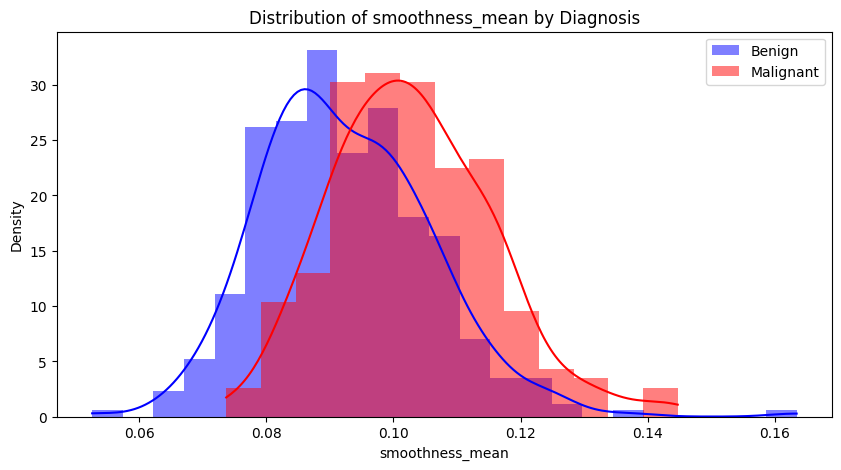

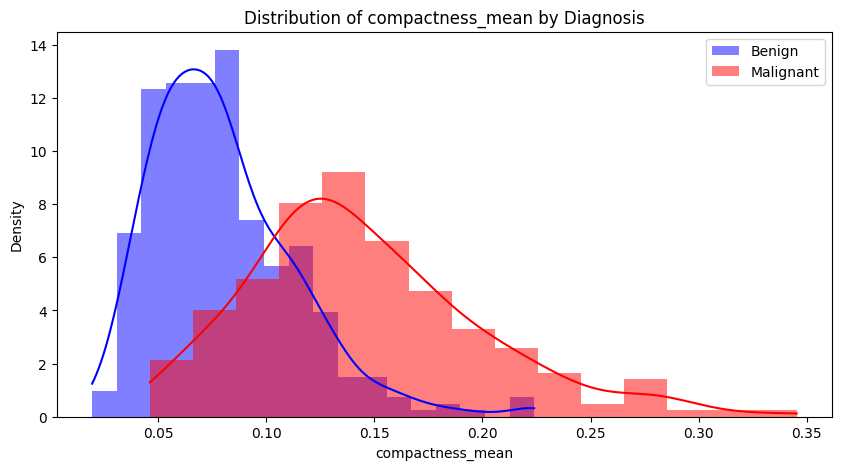

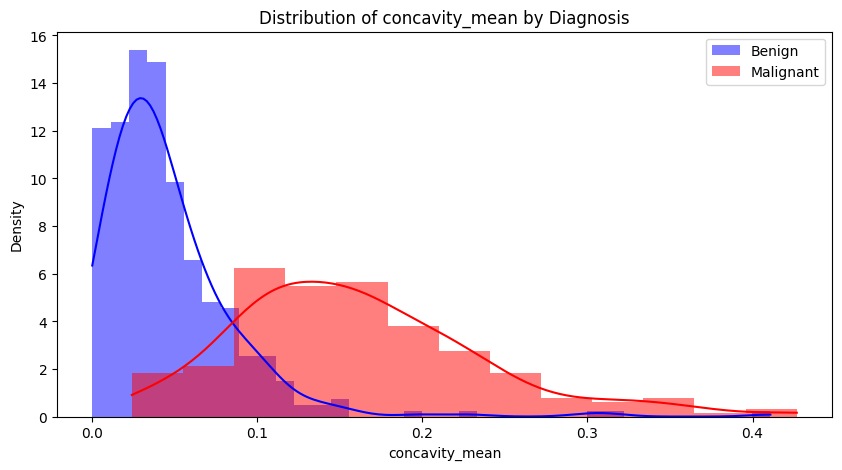

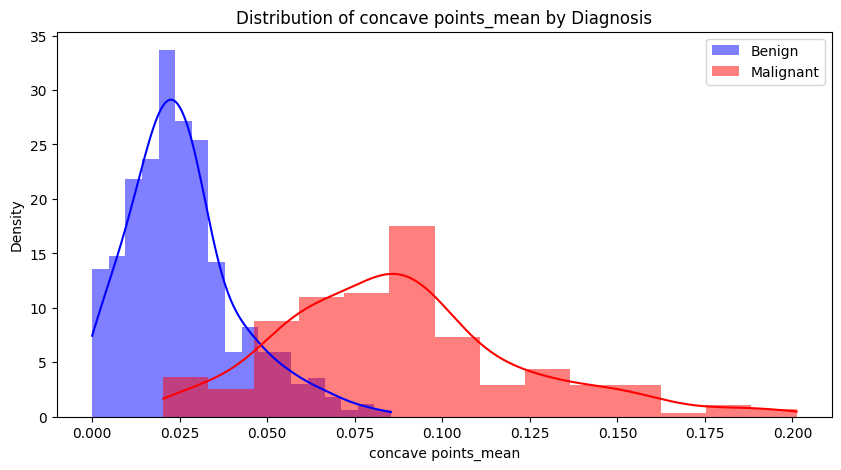

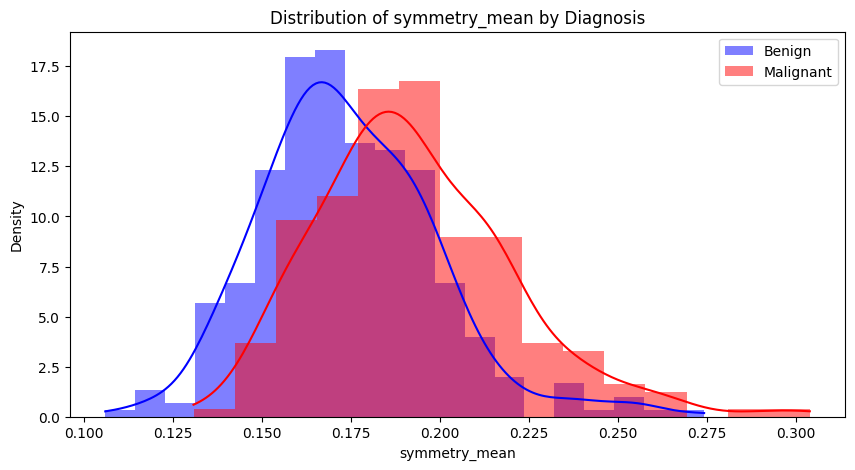

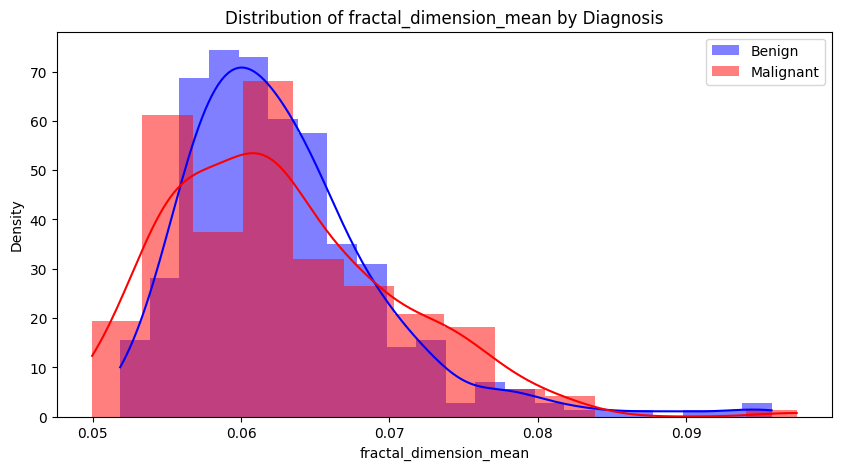

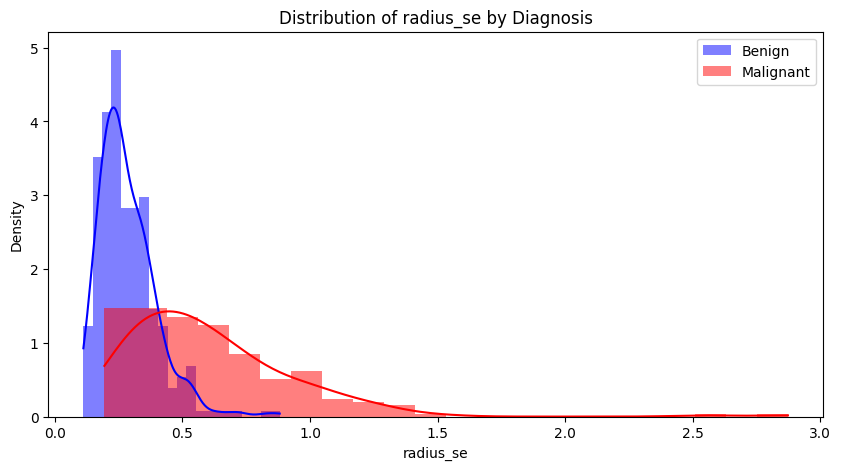

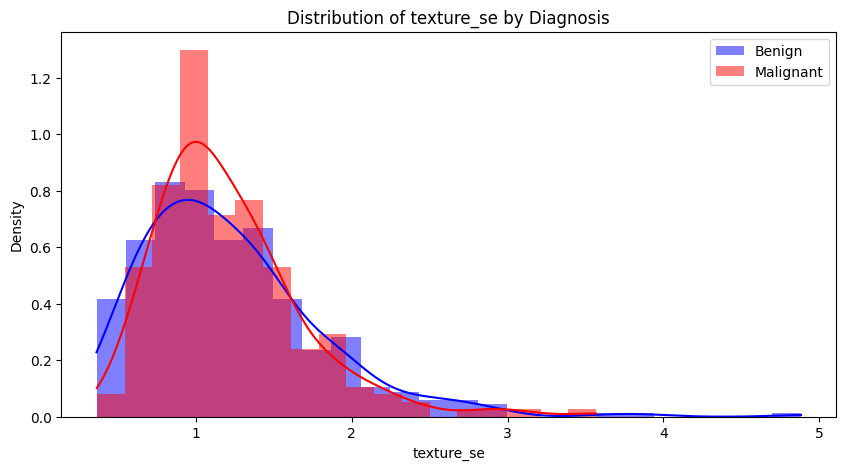

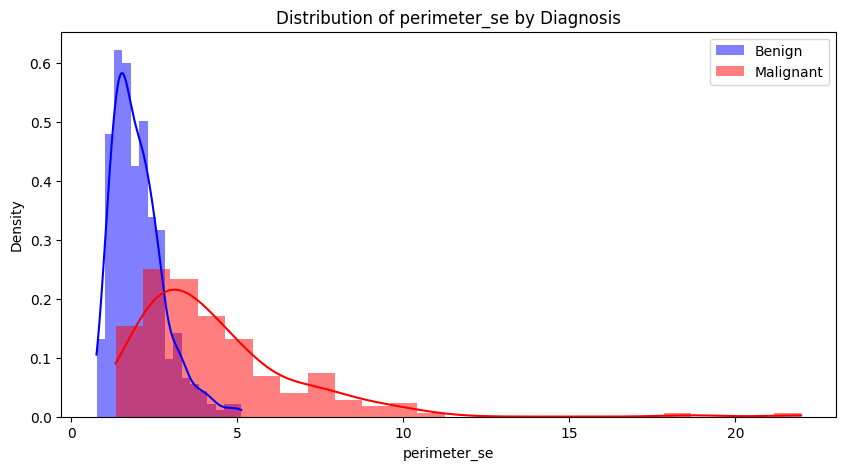

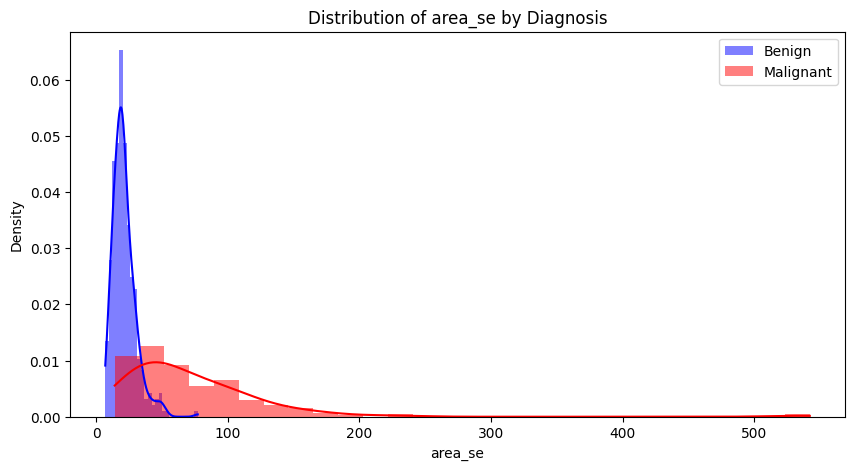

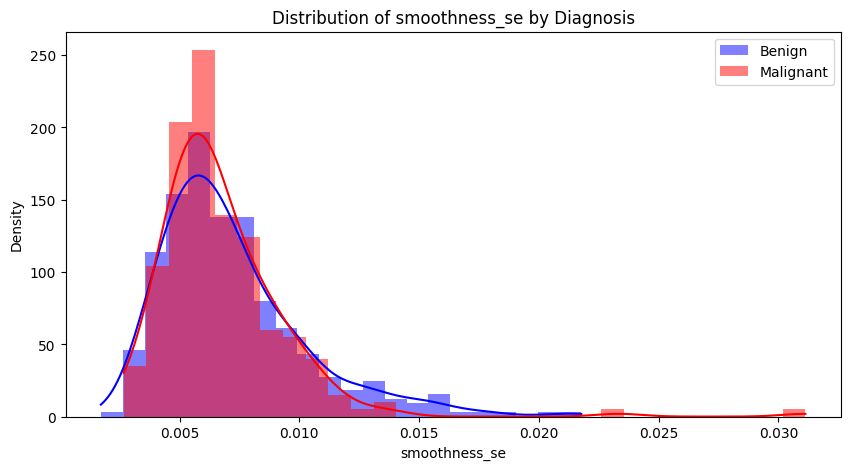

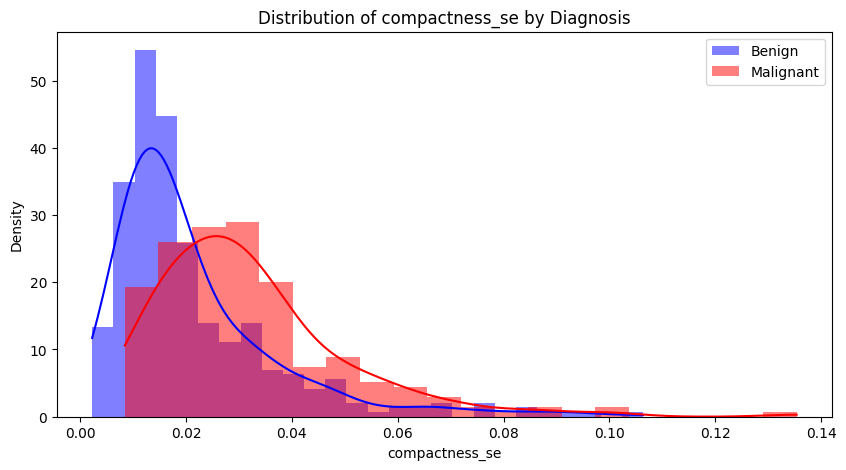

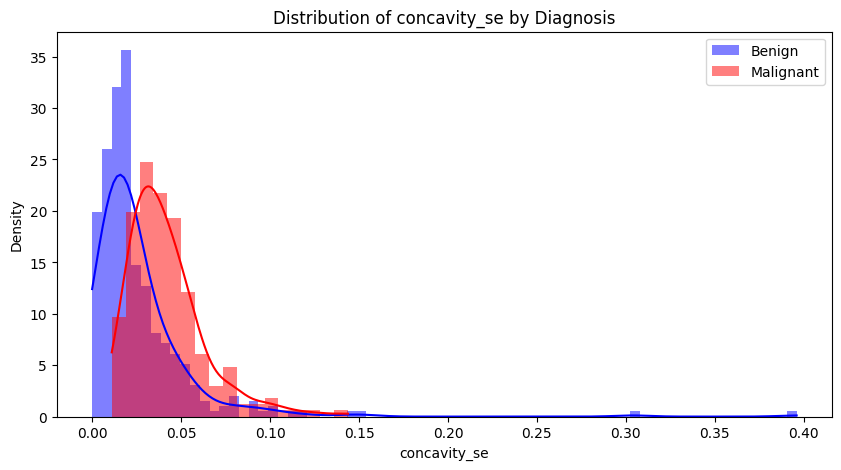

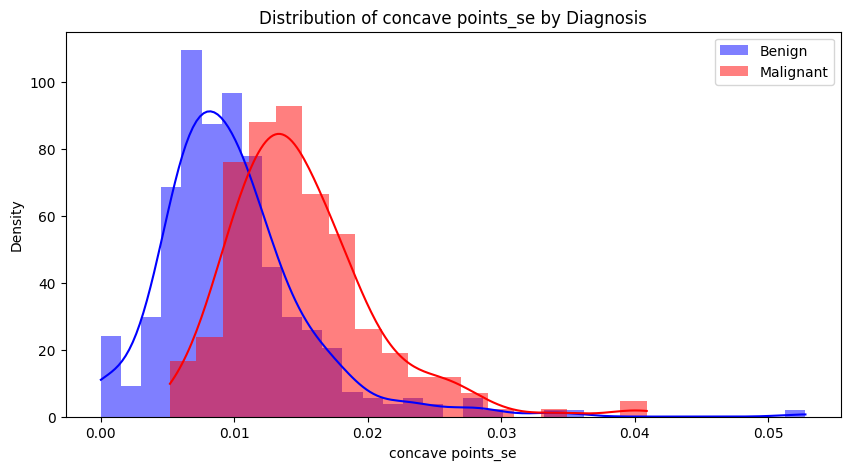

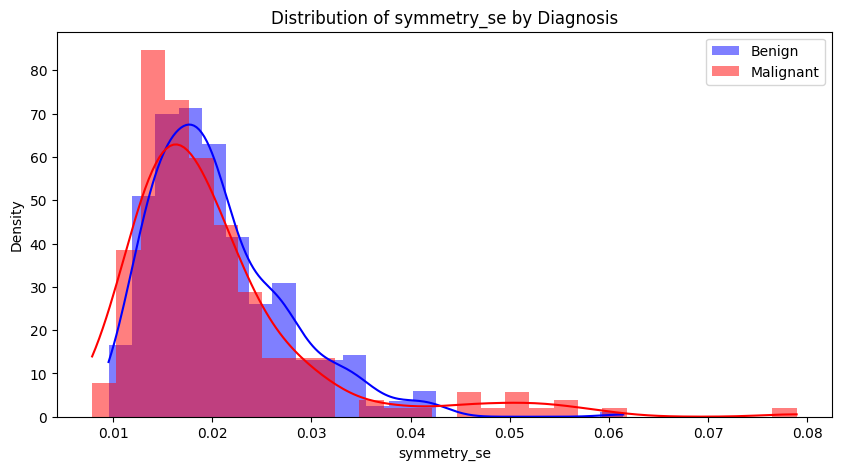

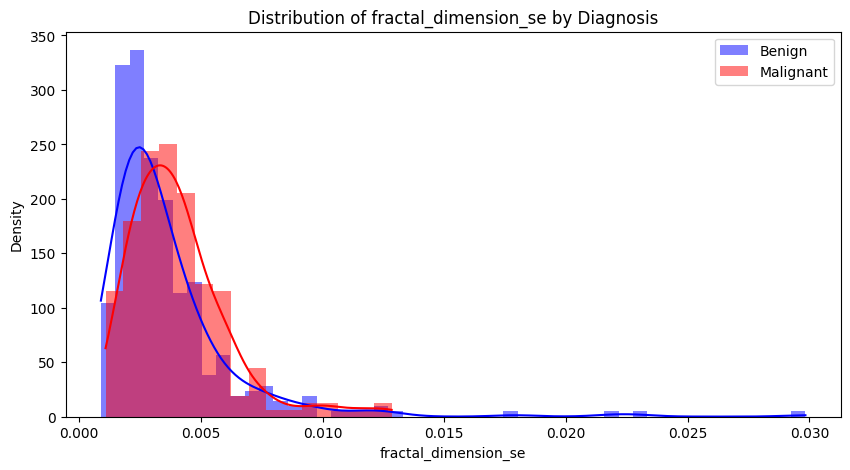

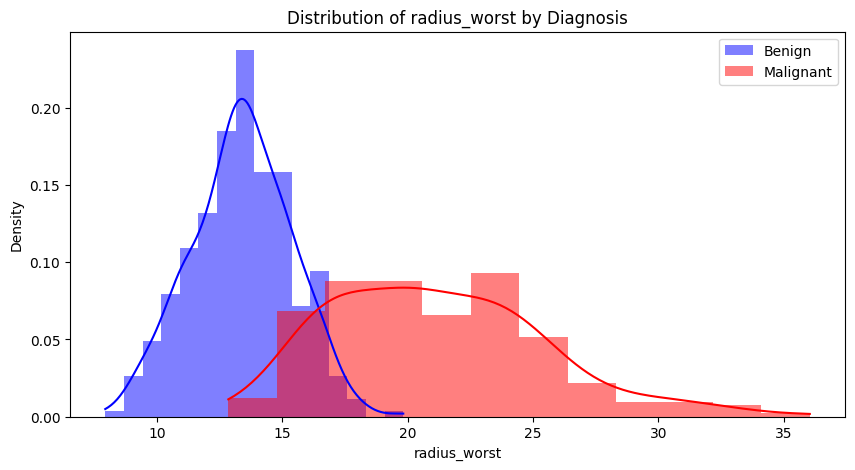

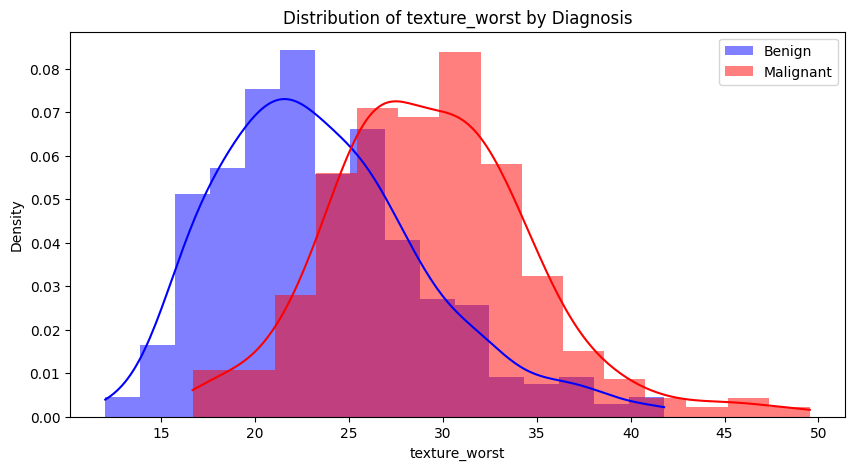

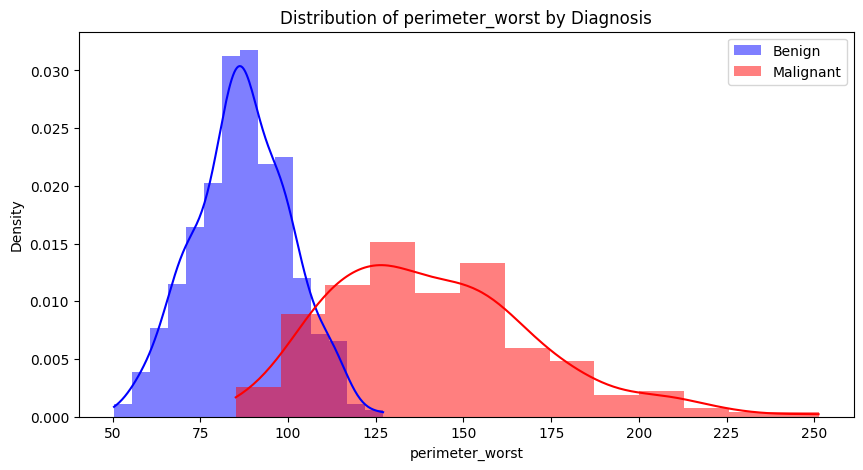

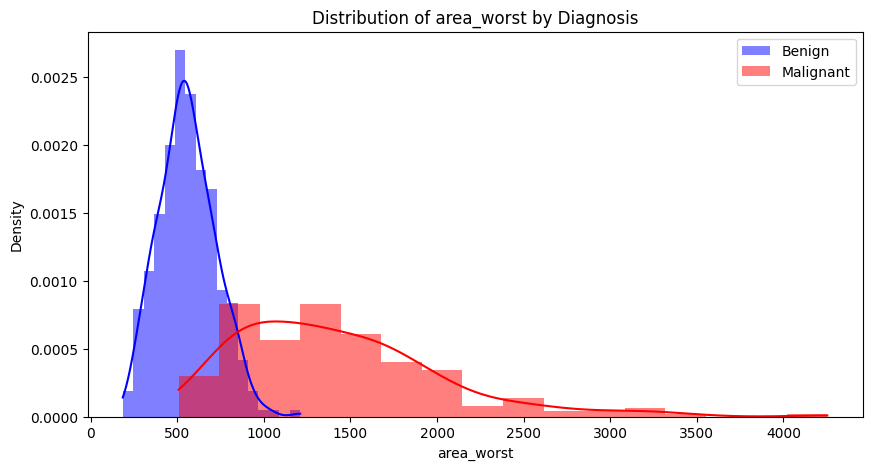

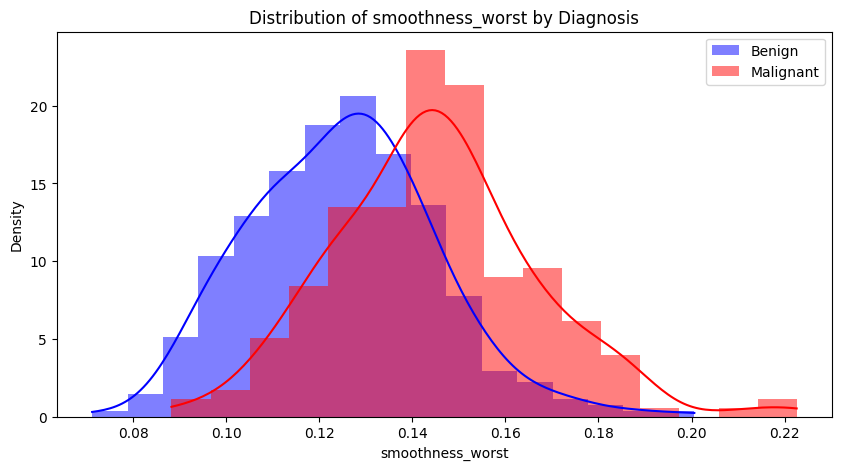

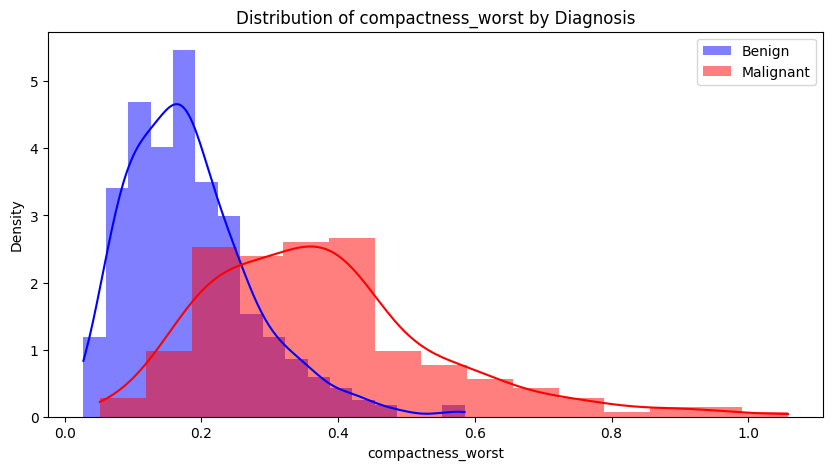

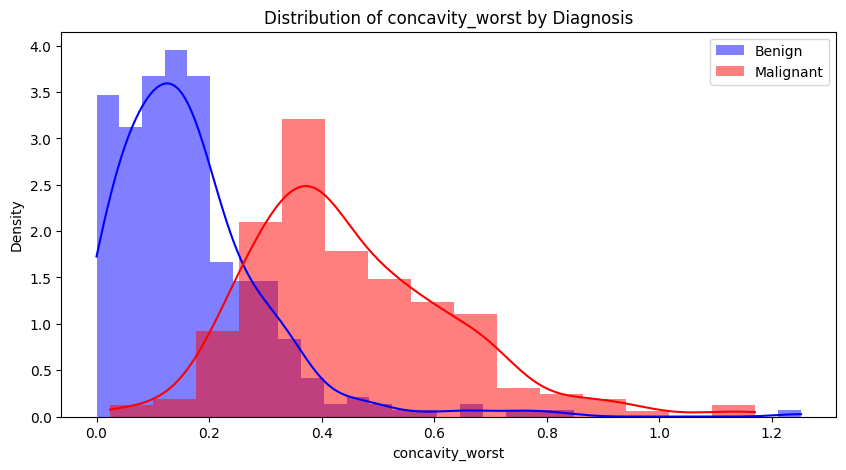

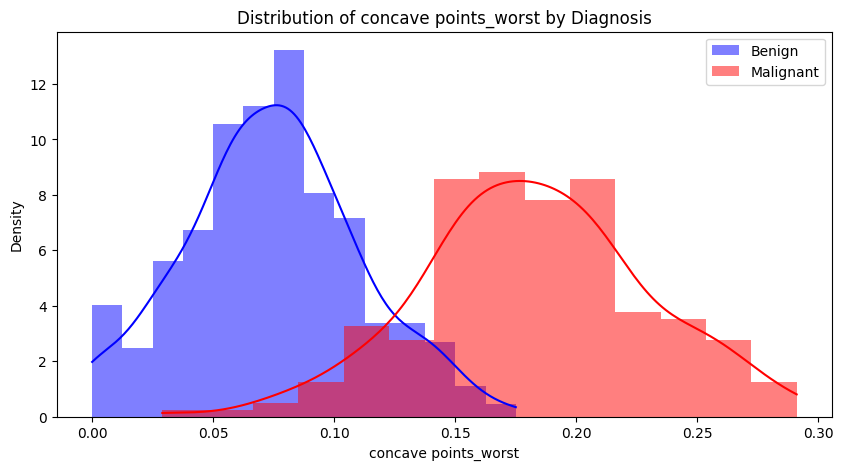

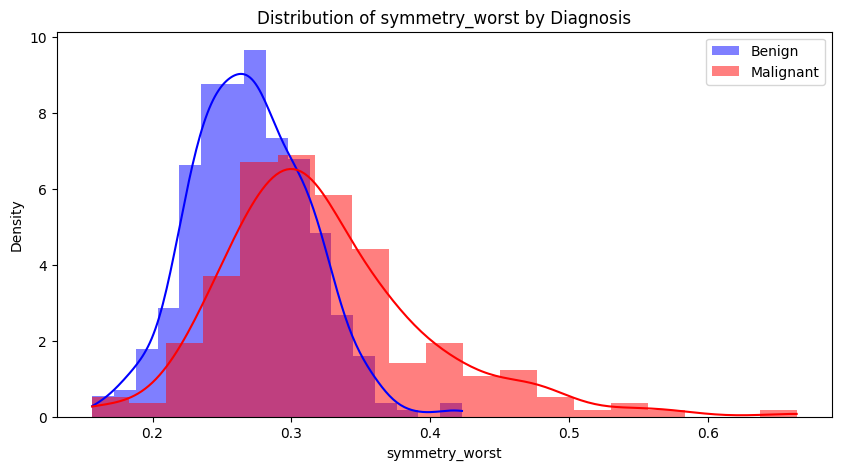

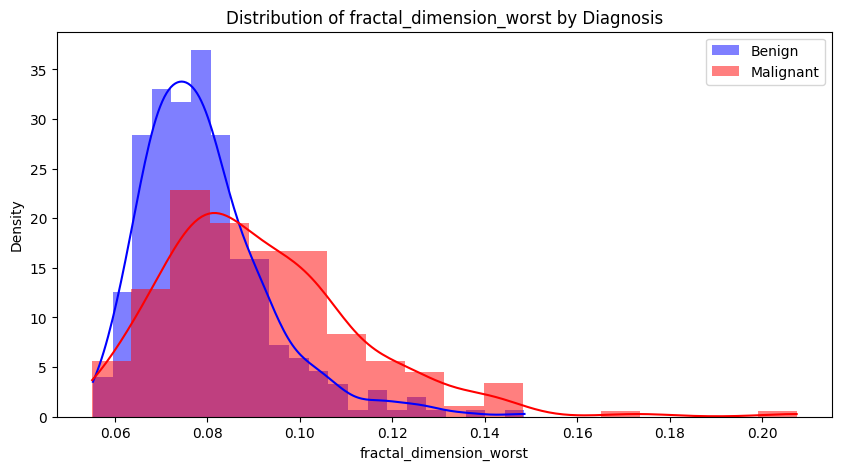

In [45]:
# Plot histograms for benign vs. malignant tumors
benign_data = dataset[dataset['diagnosis'] == 'B']
malignant_data = dataset[dataset['diagnosis'] == 'M']

for column in dataset.columns[2:]:
    plt.figure(figsize=(10, 5))
    sns.histplot(benign_data[column], color='blue', label='Benign', kde=True, stat="density", linewidth=0)
    sns.histplot(malignant_data[column], color='red', label='Malignant', kde=True, stat="density", linewidth=0)
    plt.title(f'Distribution of {column} by Diagnosis')
    plt.legend()
    plt.show()

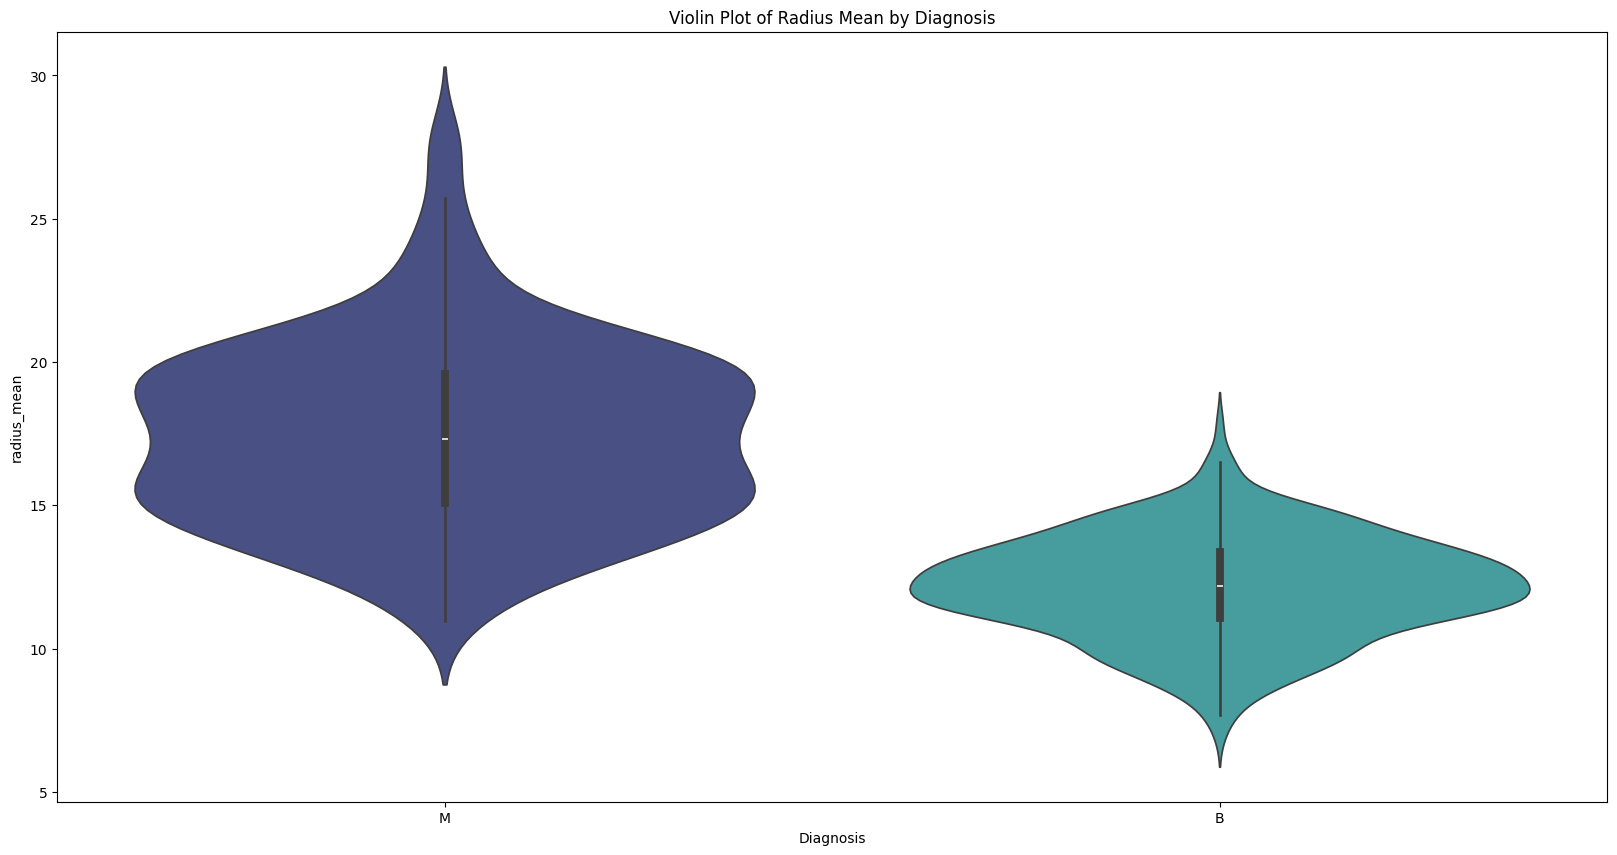

In [48]:
# Plot violin plots for comparison
plt.figure(figsize=(20, 10))
sns.violinplot(x='diagnosis', y='radius_mean', data=dataset, hue='diagnosis', palette='mako')
plt.title('Violin Plot of Radius Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.show()

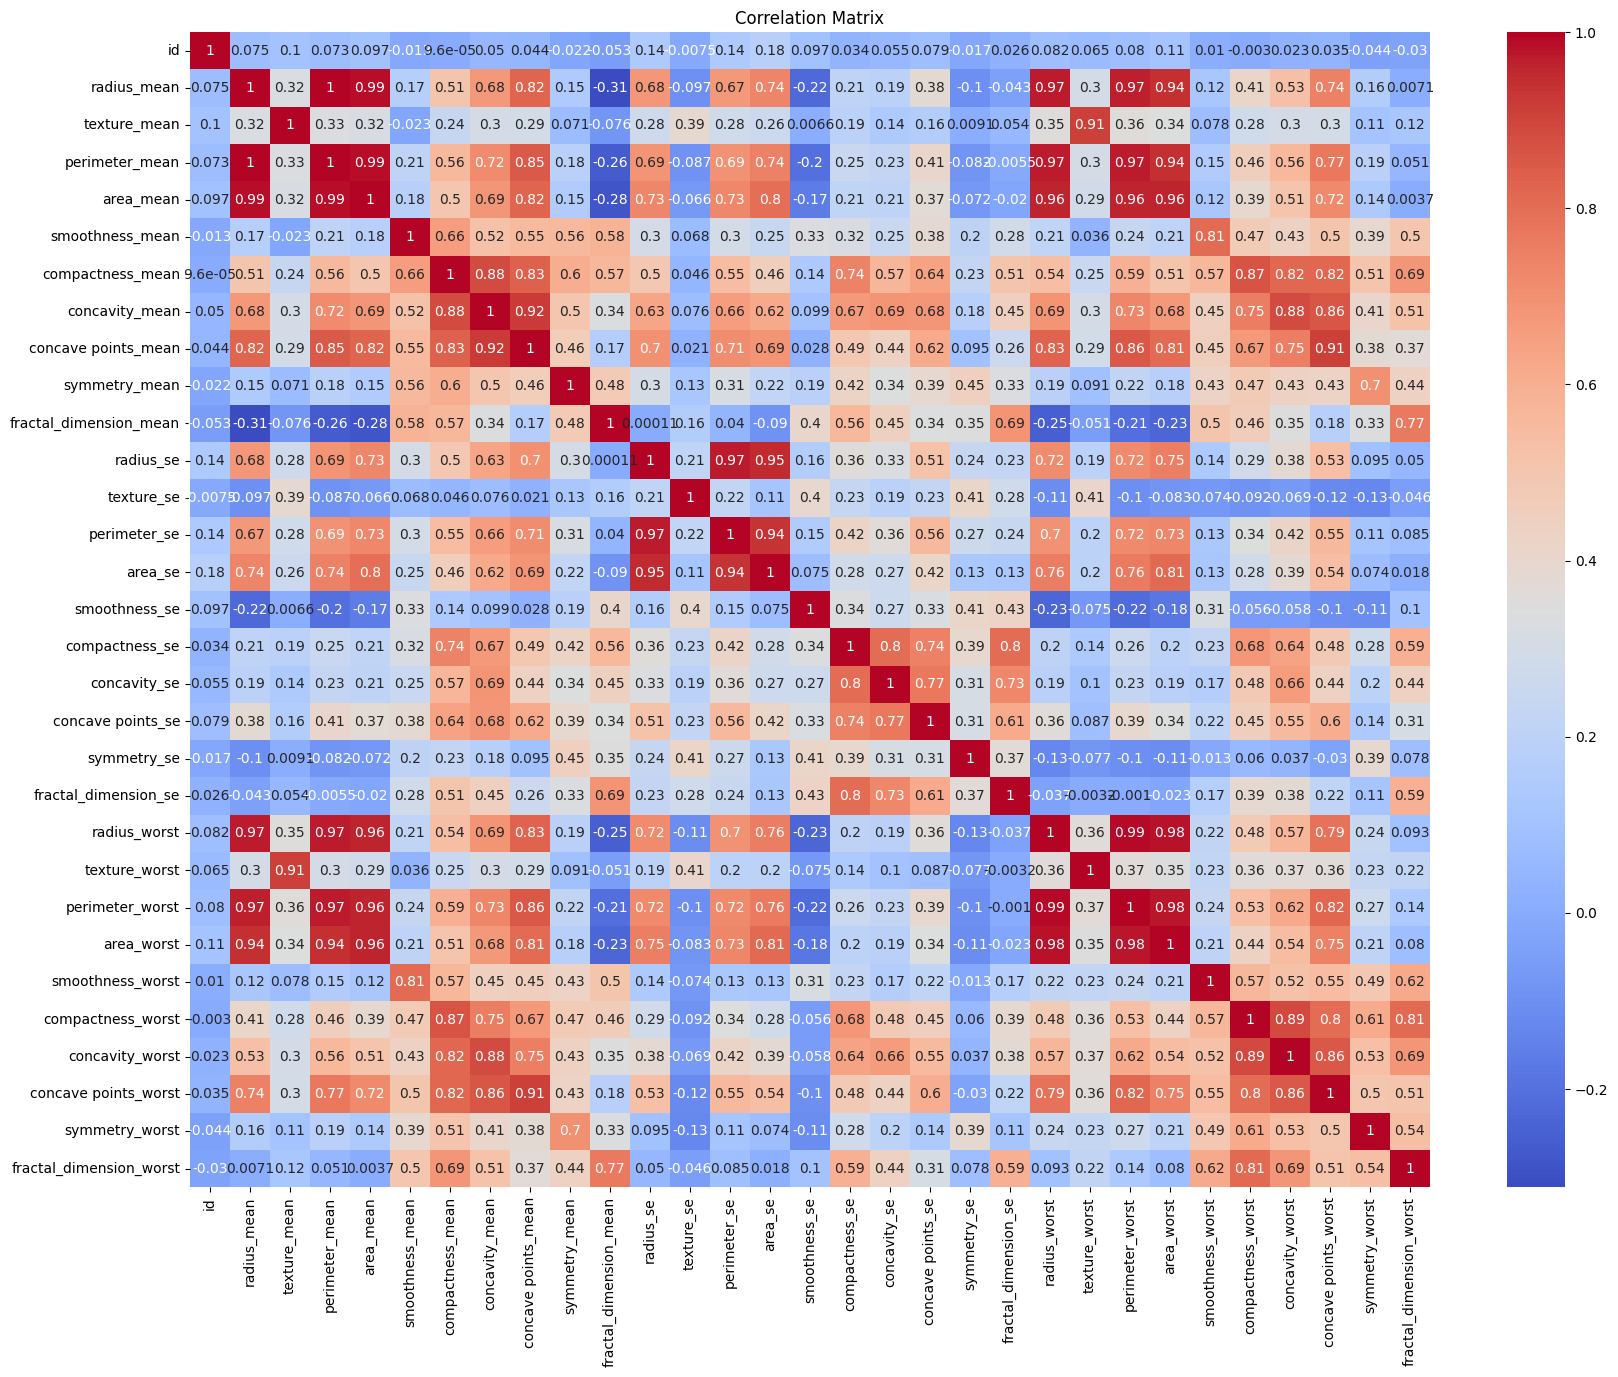

In [51]:
# Compute the correlation matrix
corr_matrix = dataset.drop('diagnosis', axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


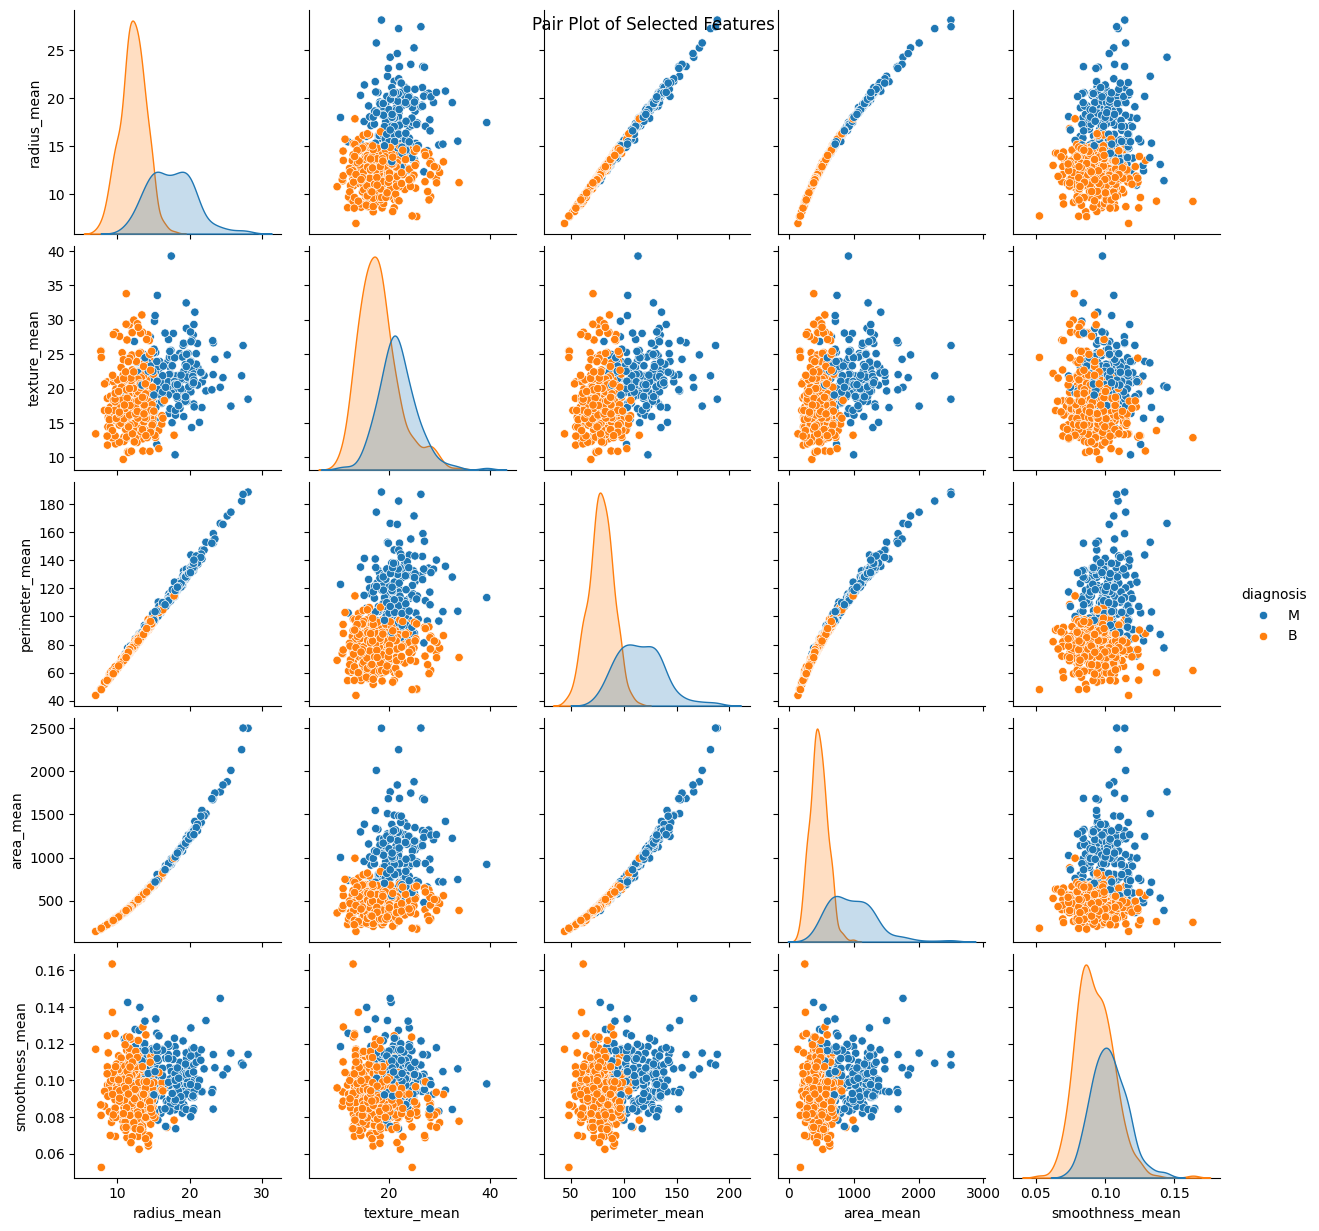

In [52]:
# Pair plot of selected features
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis']
sns.pairplot(dataset[selected_features], hue='diagnosis', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features')
plt.show()

In [53]:
# Import scikit learn packages to perform ML classification analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
# Convert the diagnosis column to numerical values
dataset['diagnosis'] = dataset['diagnosis'].map({"M": 1, "B": 0})

In [55]:
# Let's split the data to our features and target to train it
X = dataset.drop(['id', 'diagnosis'], axis=1)
y = dataset['diagnosis']

In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

